## Data loading and set up

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns 
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#initiate path and load data
path_to_data = "/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/data/student"
mat = pd.read_csv(path_to_data+'/student-mat.csv', sep=";")
print(mat.shape)
por = pd.read_csv(path_to_data+'/student-por.csv', sep=";")
print(por.shape)

(395, 33)
(649, 33)


In [3]:
# merge datasets
df = pd.concat([mat,por])
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# make pass_fail column to use as target variable
mat['pass_fail'] = 'na'
mat.loc[(mat.G3 >= 10), 'pass_fail'] = 'pass' 
mat.loc[(mat.G3 < 10), 'pass_fail'] = 'fail' 
mat.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,pass


In [5]:
# make pass_fail column to use as target variable
por['pass_fail'] = 'na'
por.loc[(por.G3 >= 10), 'pass_fail'] = 'pass' 
por.loc[(por.G3 < 10), 'pass_fail'] = 'fail' 
por.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,pass


In [6]:
# make pass_fail column to use as target variable
df['pass_fail'] = 'na'
df.loc[(df.G3 >= 10), 'pass_fail'] = 'pass' 
df.loc[(df.G3 < 10), 'pass_fail'] = 'fail' 
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,pass


## Exploratory Data Analysis

In [7]:
# file path to save figures
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/EDA/'

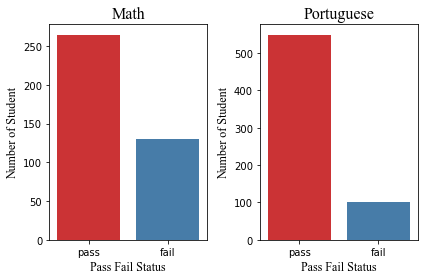

In [8]:
fig = plt.figure()
#math
ax1 = fig.add_subplot(121)
sns.countplot(mat.pass_fail, order=["pass", "fail"], palette='Set1')
plt.title('Math',fontname="Times New Roman", fontsize=16)
plt.xlabel('Pass Fail Status', fontname="Times New Roman", fontsize=12)
plt.ylabel('Number of Student', fontname="Times New Roman", fontsize=12)

#por
ax2 = fig.add_subplot(122)
sns.countplot(por.pass_fail, order=["pass", "fail"], palette='Set1')
plt.title('Portuguese',fontname="Times New Roman", fontsize=16)
plt.xlabel('Pass Fail Status', fontname="Times New Roman", fontsize=12)
plt.ylabel('Number of Student', fontname="Times New Roman", fontsize=12)

fig.tight_layout()
fig.savefig(path +"passfail.png",bbox_inches='tight')

**Figure Caption**
The figure demonstrates distribution of students across different final grafes performance. Around 60% of the students have a fair performance, but 20% of them have a poor and 20% have good performance. This is a very high % of students have a poor performance and fit with the idea that many Portugese students were underperforming. 

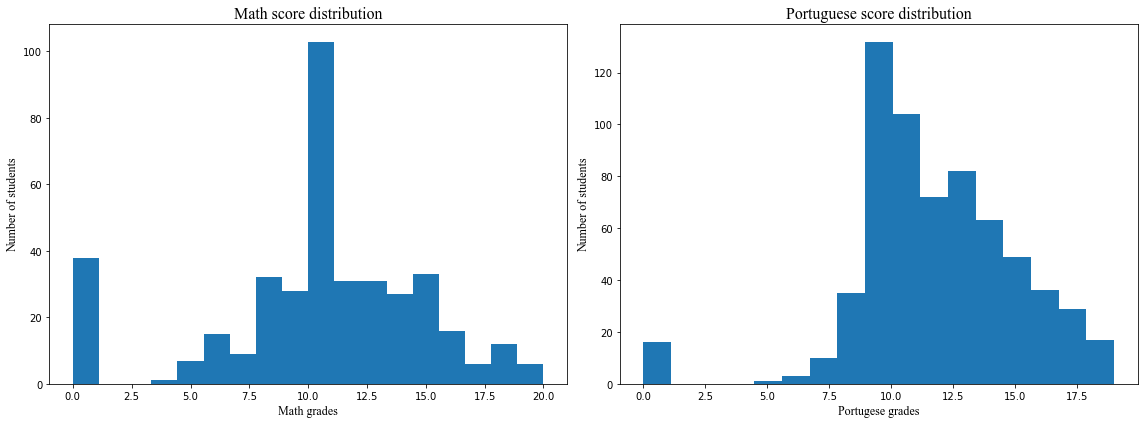

In [9]:
fig = plt.figure(figsize=(16,6))
#math
ax1 = fig.add_subplot(121)
mat['G3'].plot.hist(bins = mat['G3'].nunique())  
plt.title('Math score distribution',fontname="Times New Roman", fontsize=16)
plt.xlabel('Math grades', fontname="Times New Roman", fontsize=12)
plt.ylabel('Number of students', fontname="Times New Roman", fontsize=12)

#por
ax2 = fig.add_subplot(122)
por['G3'].plot.hist(bins = por['G3'].nunique())  
plt.title('Portuguese score distribution',fontname="Times New Roman", fontsize=16)
plt.xlabel('Portugese grades',fontname="Times New Roman", fontsize=12)
plt.ylabel('Number of students',fontname="Times New Roman", fontsize=12)

fig.tight_layout()
fig.savefig(path +"score_dist.png",bbox_inches='tight')

**Figure Caption**
The figure demonstrates distribution of students' math test scores. The math score distribution is relatively even on two sides. Most students (100 to be exact) have a grade of 10, which is an average score and 40 students have a score of 0, which is very concerning. 

**Figure Caption**
The figure demonstrates distribution of students' Portugese test scores. The Portugese score distribution is more rightward-skewed than the Math test score. Most students (~130) have a grade of 10, which is an average score and 20 students have a score of 0, which is very concerning. However, it seems like more students have a higher Portugese score than Math scores. This poses questions about Math vs Portugese teaching level of Portugese schools.

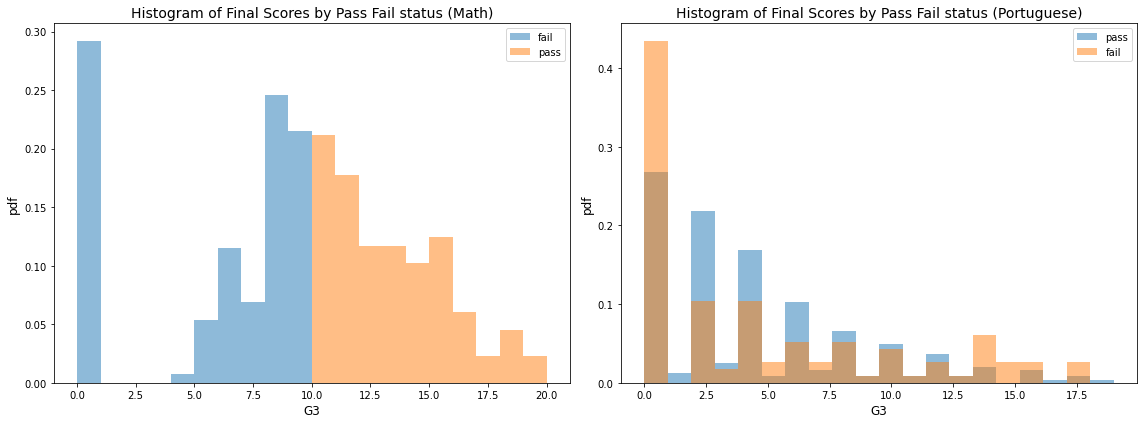

In [10]:
fig = plt.figure(figsize=(16,6))
#math
ax1 = fig.add_subplot(121)
categories = mat['pass_fail'].unique()
bin_range = (mat['G3'].min(),mat['G3'].max())

for c in categories:
    plt.hist(mat[mat['pass_fail']==c]['G3'],alpha=0.5,label=c,range=bin_range,bins=20,density=True) #alpha adjusts transparency
plt.legend()
plt.ylabel('pdf', fontsize=12)
plt.xlabel('G3', fontsize=12)
plt.title('Histogram of Final Scores by Pass Fail status (Math)', fontsize=14)


#por
ax2 = fig.add_subplot(122)
categories = por['pass_fail'].unique()
bin_range = (por['G3'].min(),por['G3'].max())

for c in categories:
    plt.hist(mat[mat['pass_fail']==c]['absences'],alpha=0.5,label=c,range=bin_range,bins=20,density=True) #alpha adjusts transparency
plt.legend()
plt.ylabel('pdf', fontsize=12)
plt.xlabel('G3', fontsize=12)
plt.title('Histogram of Final Scores by Pass Fail status (Portuguese)', fontsize=14)

fig.tight_layout()
fig.savefig(path+"scores_passfail.png",bbox_inches='tight')

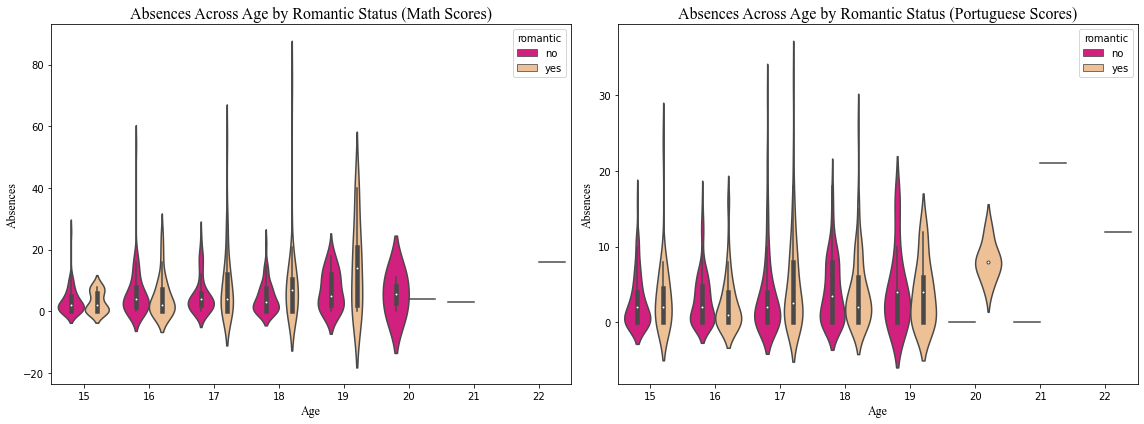

In [11]:
fig = plt.figure(figsize=(16,6))
#math
ax1 = fig.add_subplot(121)
sns.violinplot(x='age', y='absences', hue='romantic', data=mat, palette="Accent_r", ylim=(1,6))
plt.title('Absences Across Age by Romantic Status (Math Scores)',fontname="Times New Roman", fontsize=16)
plt.ylabel('Absences',fontname="Times New Roman", fontsize=12)
plt.xlabel('Age',fontname="Times New Roman", fontsize=12)

#por
ax2 = fig.add_subplot(122)
sns.violinplot(x='age', y='absences', hue='romantic', data=por, palette="Accent_r", ylim=(1,6))
plt.title('Absences Across Age by Romantic Status (Portuguese Scores)',fontname="Times New Roman", fontsize=16)
plt.ylabel('Absences',fontname="Times New Roman", fontsize=12)
plt.xlabel('Age',fontname="Times New Roman", fontsize=12)

fig.tight_layout()
fig.savefig(path+"abs_age_rom_mat_por.png",bbox_inches='tight')

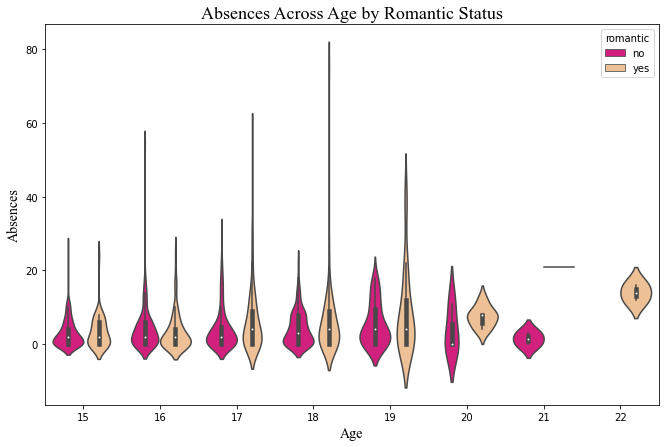

In [12]:
plt.figure(figsize=(11,7))
sns.violinplot(x='age', y='absences', hue='romantic', data=df, palette="Accent_r")
plt.title('Absences Across Age by Romantic Status',fontname="Times New Roman", fontsize=18)
plt.ylabel('Absences',fontname="Times New Roman", fontsize=14)
plt.xlabel('Age',fontname="Times New Roman", fontsize=14)
plt.savefig(path+"abs_age_rom.png",bbox_inches='tight')

**Figure Caption**
The figure demonstrates distribution of students' study time across different age, classified into whether the student wants to achieve higher education or not. It seems that the older the students get, the more they want to achieve higher education, but also overall, however, the distribution of students who don't want to achieve higher education is also quite close to those who want to, which raises some concerns about how the Portugese school system and other social factors influence students' choice to achieve higher education. There is also a positive relationship between the students' study time and whether they want to achieve higher education. This makes sense because more motivated students will want to achieve higher educaiton. However, this alerts that more measures should be taken to incentivies students to study more and year higher education in a way that balance their well-being and happiness as well.

<Figure size 432x288 with 0 Axes>

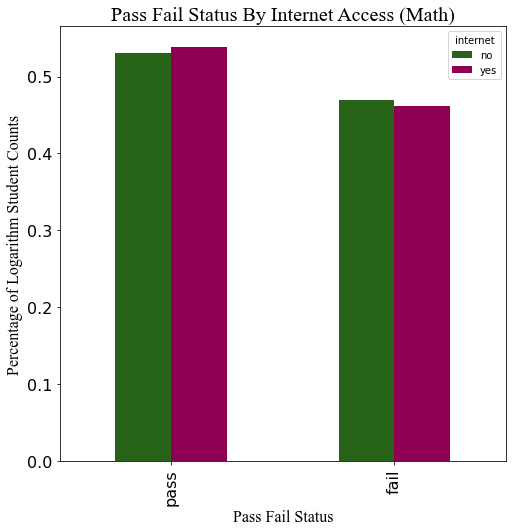

In [13]:
## Romantic Relationship and Math Score Performance
perc = (lambda col: col/col.sum())
index = ['pass', 'fail']
romance_tab1 = pd.crosstab(index=mat.pass_fail, columns=mat.internet)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Pass Fail Status By Internet Access (Math)',fontname="Times New Roman", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts',fontname="Times New Roman", fontsize=16)
plt.xlabel('Pass Fail Status',fontname="Times New Roman", fontsize=16)
plt.savefig(path+"passfail_rom_mat.png",bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

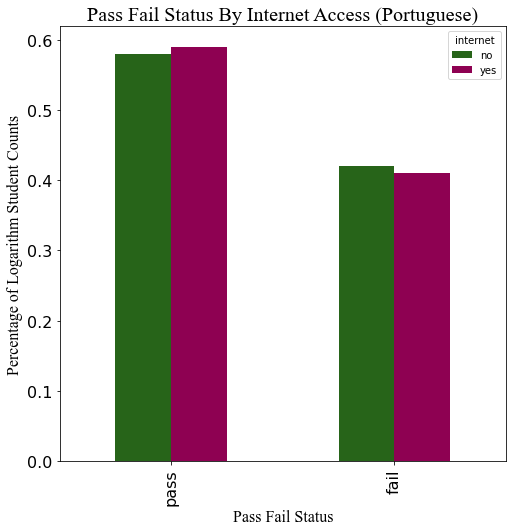

In [14]:
## Romantic Relationship and Portuguese Score Performance
perc = (lambda col: col/col.sum())
index = ['pass', 'fail']
net_tab1 = pd.crosstab(index=por.pass_fail, columns=por.internet)
net_tab = np.log(net_tab1)
net_perc = net_tab.apply(perc).reindex(index)

plt.figure()
net_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Pass Fail Status By Internet Access (Portuguese)',fontname="Times New Roman", fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts',fontname="Times New Roman", fontsize=16)
plt.xlabel('Pass Fail Status',fontname="Times New Roman", fontsize=16)
plt.savefig(path+"passfail_rom_por.png",bbox_inches='tight')
plt.show()

**Figure Caption**
The figure demonstrates distribution of students' relationship status across different final grade performance. It seems that more students who don't have a relationship have better final grade performance and vice versa, though the disparity isn't siginificant. This signals that students should not be in a relationship if they want to do well in school, but since the difference is not big, intervention measures need to be sensible and cognizant of the students' social development. 

In [15]:
#Mjob tab
perc = (lambda col: col/col.sum())
index = ['pass', 'fail']
Mjob_tab1 = pd.crosstab(index=df.pass_fail, columns=df.Mjob)
Mjob_tab = np.log(Mjob_tab1)
Mjob_perc = Mjob_tab.apply(perc).reindex(index)

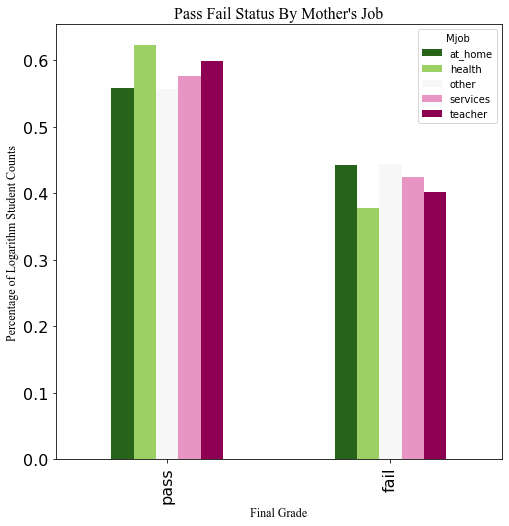

In [16]:
#Mjob
Mjob_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title("Pass Fail Status By Mother's Job",fontname="Times New Roman", fontsize=16)
plt.ylabel('Percentage of Logarithm Student Counts',fontname="Times New Roman", fontsize=12)
plt.xlabel('Final Grade',fontname="Times New Roman", fontsize=12)
plt.savefig(path+"mom_passfail.png",bbox_inches='tight')

In [17]:
#Fjob tab
Fjob_tab1 = pd.crosstab(index=df.pass_fail, columns=df.Fjob)
Fjob_tab = np.log(Fjob_tab1)
Fjob_perc = Fjob_tab.apply(perc).reindex(index)

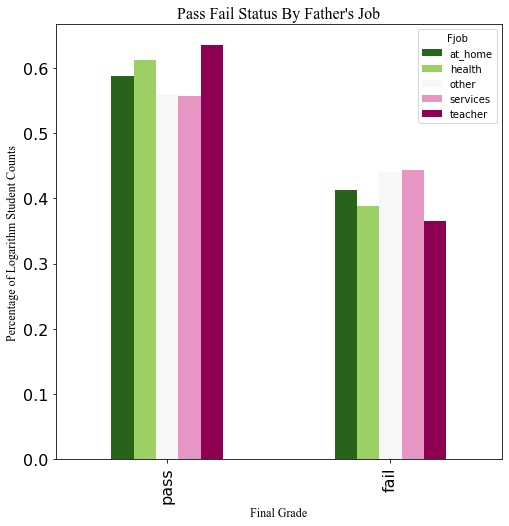

In [18]:
#Fjob
Fjob_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title("Pass Fail Status By Father's Job",fontname="Times New Roman", fontsize=16)
plt.ylabel('Percentage of Logarithm Student Counts',fontname="Times New Roman", fontsize=12)
plt.xlabel('Final Grade',fontname="Times New Roman", fontsize=12)
plt.savefig(path+"dad_passfail.png",bbox_inches='tight')

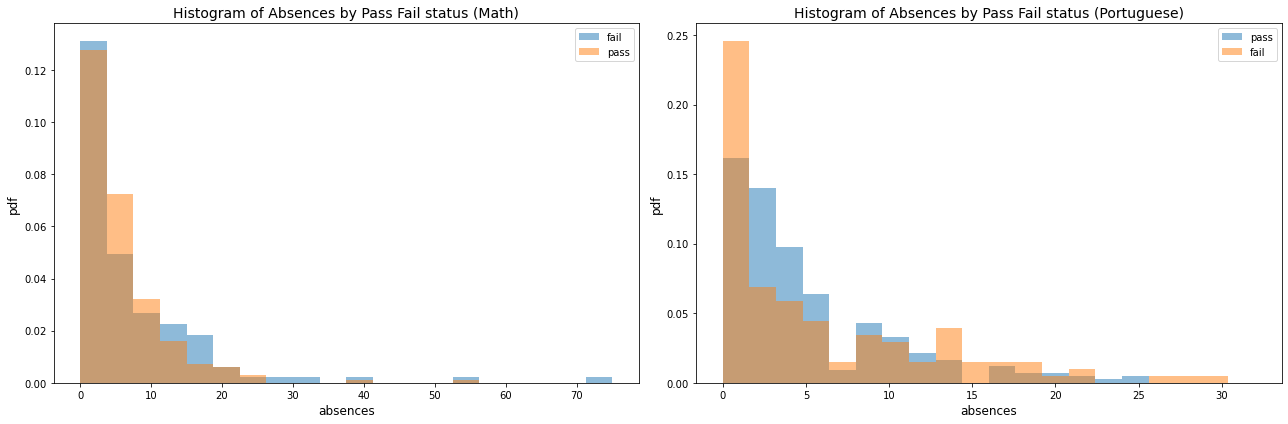

In [19]:
fig = plt.figure(figsize=(18,6))
#math
ax1 = fig.add_subplot(121)
categories = mat['pass_fail'].unique()
bin_range = (mat['absences'].min(),mat['absences'].max())

for c in categories:
    plt.hist(mat[mat['pass_fail']==c]['absences'],alpha=0.5,label=c,range=bin_range,bins=20,density=True) #alpha adjusts transparency
plt.legend()
plt.ylabel('pdf', fontsize=12)
plt.xlabel('absences', fontsize=12)
plt.title('Histogram of Absences by Pass Fail status (Math)', fontsize=14)


#por
ax2 = fig.add_subplot(122)
categories = por['pass_fail'].unique()
bin_range = (por['absences'].min(),por['absences'].max())

for c in categories:
    plt.hist(mat[mat['pass_fail']==c]['absences'],alpha=0.5,label=c,range=bin_range,bins=20,density=True) #alpha adjusts transparency
plt.legend()
plt.ylabel('pdf', fontsize=12)
plt.xlabel('absences', fontsize=12)
plt.title('Histogram of Absences by Pass Fail status (Portuguese)', fontsize=14)

fig.tight_layout()
fig.savefig(path+"abs_passfail.png",bbox_inches='tight')

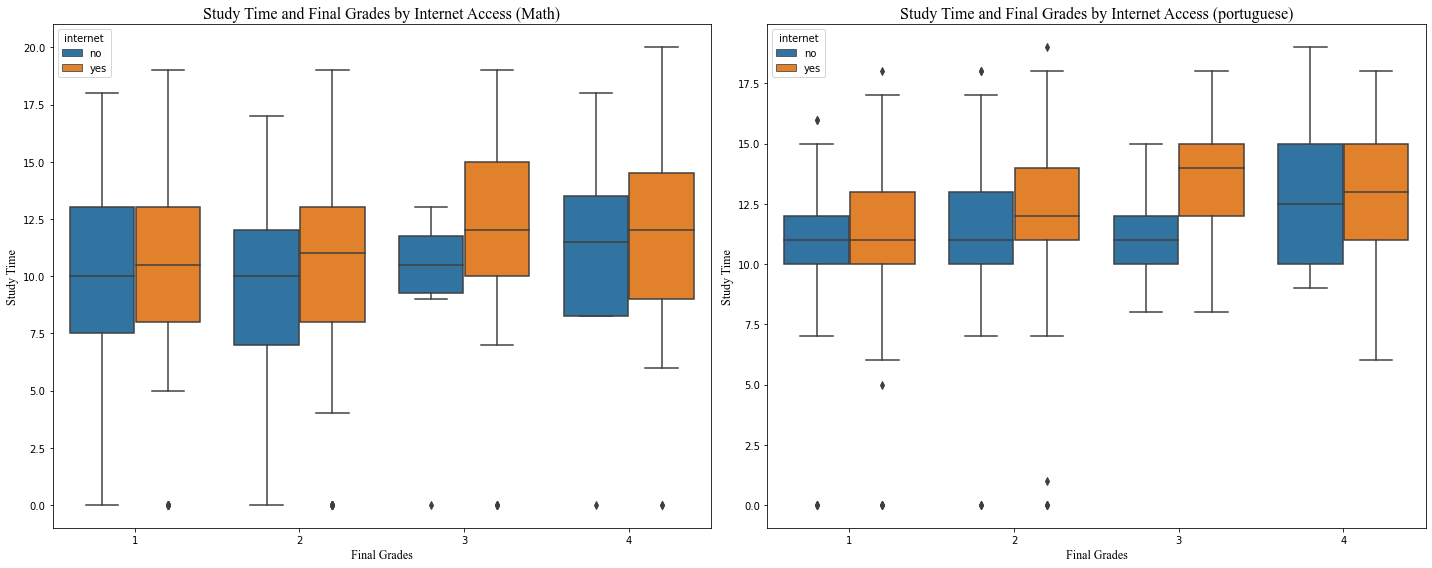

In [20]:
#plt.figure(figsize=(10, 8))
fig = plt.figure(figsize=(20,8))
#math
ax1 = fig.add_subplot(121)

sns.boxplot(x="studytime", y="G3", hue='internet',data=mat)
plt.ylabel("Study Time",fontname="Times New Roman", fontsize=12)
plt.xlabel("Final Grades",fontname="Times New Roman", fontsize=12)
plt.title("Study Time and Final Grades by Internet Access (Math)",fontname="Times New Roman", fontsize=16)

ax2 = fig.add_subplot(122)
sns.boxplot(x="studytime", y="G3", hue='internet',data=por)
plt.ylabel("Study Time",fontname="Times New Roman", fontsize=12)
plt.xlabel("Final Grades",fontname="Times New Roman", fontsize=12)
plt.title("Study Time and Final Grades by Internet Access (portuguese)",fontname="Times New Roman", fontsize=16)

fig.tight_layout()
fig.savefig(path+"studytime_internet_grades_mat_por.png",bbox_inches='tight')

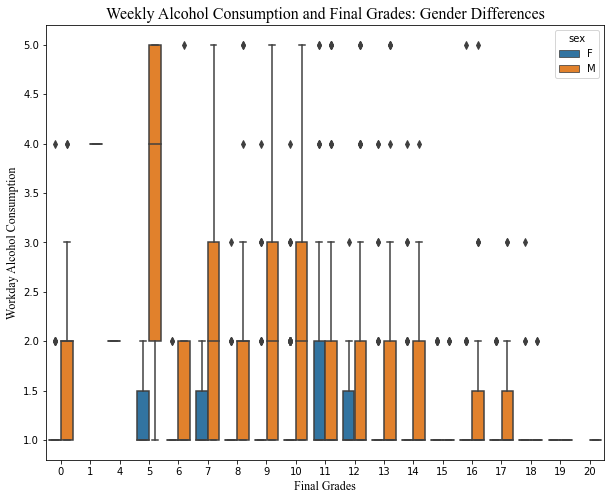

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="G3", y="Dalc", hue='sex',data=df)
plt.ylabel("Workday Alcohol Consumption",fontname="Times New Roman", fontsize=12)
plt.xlabel("Final Grades",fontname="Times New Roman", fontsize=12)
plt.title("Weekly Alcohol Consumption and Final Grades: Gender Differences",fontname="Times New Roman", fontsize=16)
plt.savefig(path+"dalc_grades_gender.png",bbox_inches='tight')

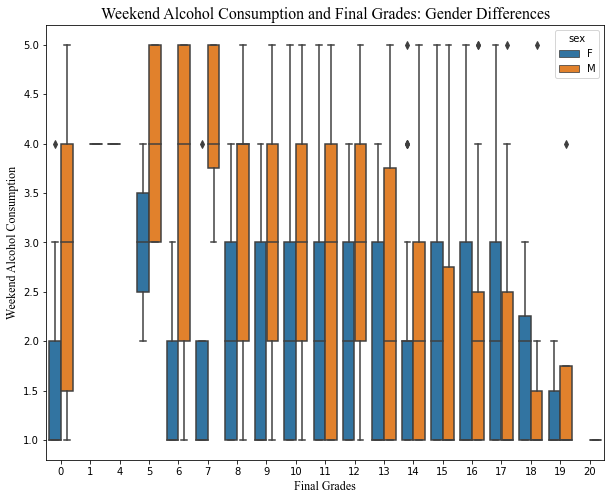

In [22]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="G3", y="Walc", hue='sex',data=df)
plt.ylabel("Weekend Alcohol Consumption",fontname="Times New Roman", fontsize=12)
plt.xlabel("Final Grades",fontname="Times New Roman", fontsize=12)
plt.title("Weekend Alcohol Consumption and Final Grades: Gender Differences",fontname="Times New Roman", fontsize=16)
plt.savefig(path+"walc_grades_gender.png",bbox_inches='tight')

**Figure Caption**
The figures demonstrate final grades across measures of distributions of students' weekend and weekday alcohol consumption, classified by gender. There are some expected observations here. Students who have less alcohol consumption tend to get higher grades and vicer versa, and more male students consume alcohol than female students. Students drink significantly more on the weekend than weekday. This suggests that some intervention and educational efforts should be executed to teach students about appropriate drink habits and how it can affect their study.

## Scatter matrix

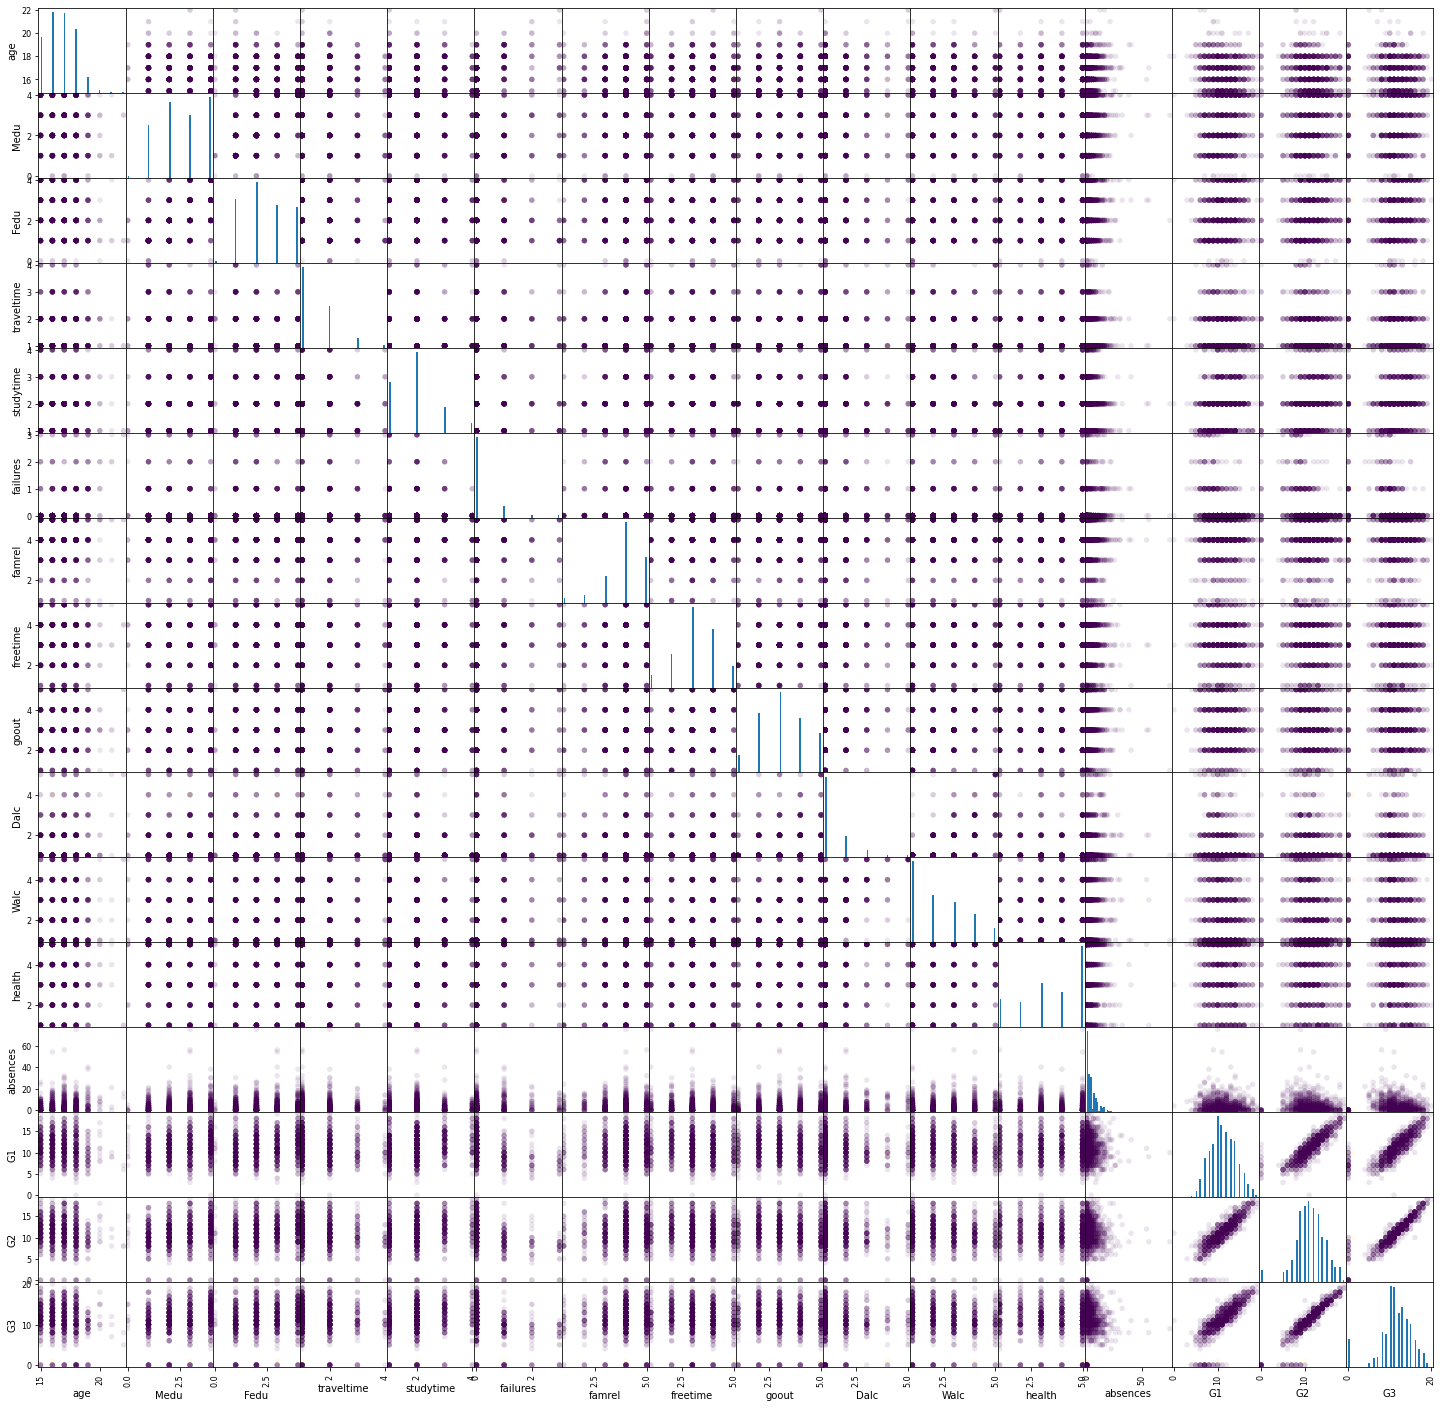

<Figure size 432x288 with 0 Axes>

In [23]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(25, 25),c = pd.get_dummies(df['G3']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.show()
plt.savefig(path+"scatter_matrix.png",bbox_inches='tight')

**Figure Caption**
The figure encapsulates the relationship between all variables in the dataset for regression problems. It seems that there is a strong positive relationship between the 1st and 2nd period scores and final scores, signaling that score prediction can be quite accurate. Relationships between final scores and other variales aren't s obvious.

## Correlation heatmap

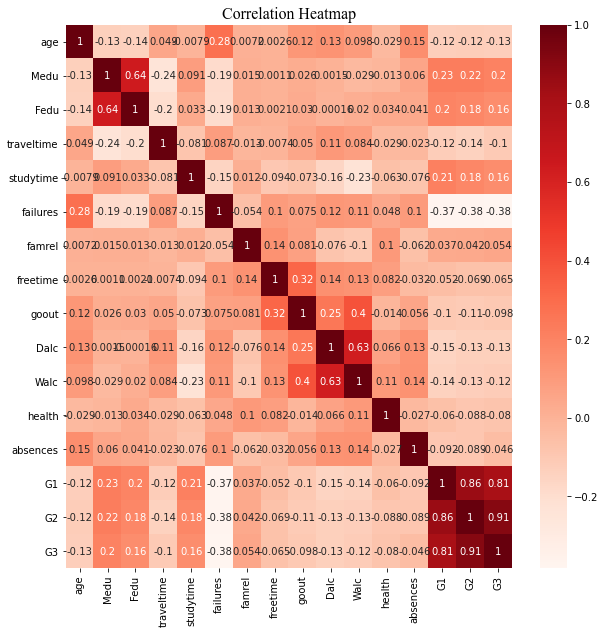

In [24]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap',fontname="Times New Roman", fontsize=16)
plt.savefig(path+"corr_heatmap.png",bbox_inches='tight')

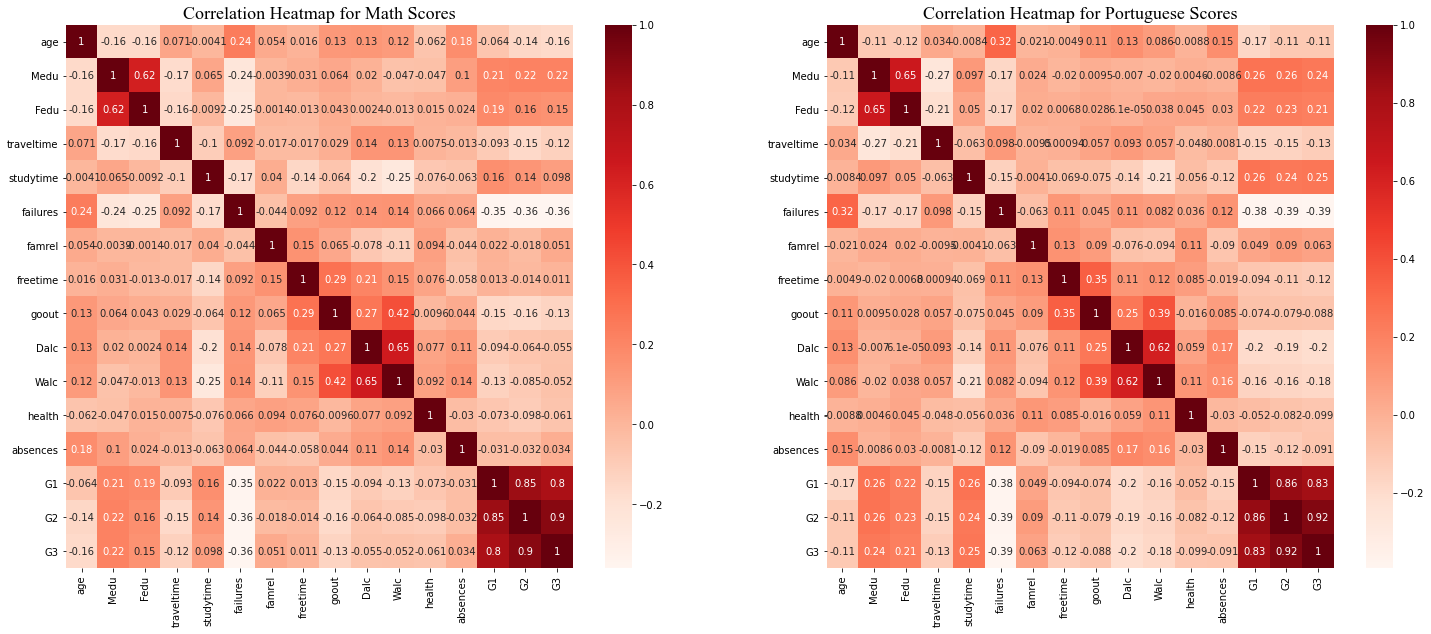

In [25]:
mat_corr = mat.corr()
fig = plt.figure(figsize=(25,10))
#math
ax1 = fig.add_subplot(121)
sns.heatmap(mat_corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap for Math Scores',fontname="Times New Roman", fontsize=18)

por_corr = por.corr()
#por
ax2 = fig.add_subplot(122)
sns.heatmap(por_corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap for Portuguese Scores',fontname="Times New Roman", fontsize=18)

#fig.tight_layout()
fig.savefig(path+"mat_por_heatmaps.png",bbox_inches='tight')

**Figure Caption**
The figure encapsulates the correlation between all variables in the dataset for classification problems. It seems that there is a strong positive relationship between the 1st and 2nd period scores and final scores, signaling that score prediction can be quite accurate. Final scores also seem to have quite strong positive relationships with the mother and father's education and study time which is quite expected. Some other positive but weaker relationships between finals cores and other variables include family quality and free time, sugesting that such factors can be important to focus on to improve students' performance. There are is also a negative relationship between final age and scores, which can be because as the students get older, the materials they study get harder and they are less likely to get high scores. There is also a weak negative relationship between health and final scores, raising concerns that students may be studying at the expense of their mental health. 